In [12]:
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'C:/BEPEC Python Material/Machine Learning/Logistic Regression/credit_card.xlsx', engine='openpyxl')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
column_names = df.loc[0,:]
column_names = column_names.to_list()
l1 = df.columns
l1 = l1.to_list()
df.columns = column_names
df.rename(columns= {'PAY_0':'PAY_1'}, inplace=True)
df.drop([0], inplace=True)
column_names = df.columns
for column in column_names:
    df[column] = pd.to_numeric(df[column]) 
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.drop(columns={'ID'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_1                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


# RFE TEchnique

In [9]:
from sklearn.feature_selection import RFE
import xgboost


In [10]:
from xgboost import XGBClassifier
clf = XGBClassifier()

In [13]:
rfe = RFE(clf)
rfe = rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)

[20:36:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [15]:
mask = rfe.support_
feat = X.columns
feat_imp = feat[mask]
print(mask)
print(feat)
print(feat_imp)
X_imp = X[feat_imp]
print(X.shape)
print(X_imp.shape)

[ True False False False False  True  True  True  True  True  True  True
 False False False False False False  True  True False False  True]
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')
Index(['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT6'],
      dtype='object')
(30000, 23)
(30000, 11)


# Univariate method

In [19]:
from sklearn.feature_selection import  chi2 , SelectKBest , f_classif

In [27]:
X_new = SelectKBest(score_func = f_classif , k = 'all').fit(X , y)
score = X_new.scores_
print(score)
p_value = X_new.pvalues_ 
print(p_value)
X_new_data = X_new.transform(X)
print(X_new_data.shape)
"""
X_new2 = SelectKBest(score_func = chi2 , k = 'all').fit_transform(X , y)
print(X_new2.shape) # Error input must be non-negative
"""

[7.24068539e+02 4.79788543e+01 2.35471118e+01 1.77812714e+01
 5.78855582e+00 5.57969146e+03 3.59400463e+03 2.69268781e+03
 2.34105083e+03 2.19017600e+03 1.90626662e+03 1.15805315e+01
 6.04423789e+00 5.94438771e+00 3.09474518e+00 1.37108740e+00
 8.65820292e-01 1.60403810e+02 1.03291524e+02 9.52180109e+01
 9.71880005e+01 9.14298008e+01 8.50890453e+01]
[1.30224395e-157 4.39524880e-012 1.22503803e-006 2.48536389e-005
 1.61368459e-002 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 6.67329549e-004
 1.39573624e-002 1.47699827e-002 7.85556416e-002 2.41634443e-001
 3.52122521e-001 1.14648761e-036 3.16665676e-024 1.84177029e-022
 6.83094160e-023 1.24134477e-021 3.03358907e-020]
(30000, 23)


"\nX_new2 = SelectKBest(score_func = chi2 , k = 'all').fit_transform(X , y)\nprint(X_new2.shape) # Error input must be non-negative\n"

In [62]:
dic = dict(names = feat , importance = score)
dic
Feature_scores = pd.DataFrame(dic)
Feature_scores

,names,importance
0,LIMIT_BAL,724.068539
1,SEX,47.978854
2,EDUCATION,23.547112
3,MARRIAGE,17.781271
4,AGE,5.788556
5,PAY_1,5579.691462
6,PAY_2,3594.004631
7,PAY_3,2692.687809
8,PAY_4,2341.050833
9,PAY_5,2190.175998


In [63]:
Feature_scores.nlargest(10 , 'importance')

,names,importance
5,PAY_1,5579.691462
6,PAY_2,3594.004631
7,PAY_3,2692.687809
8,PAY_4,2341.050833
9,PAY_5,2190.175998
10,PAY_6,1906.266618
0,LIMIT_BAL,724.068539
17,PAY_AMT1,160.403810
18,PAY_AMT2,103.291524
20,PAY_AMT4,97.188000


In [53]:
feat = X.columns
for j in feat:
    X.iloc[X[j]] =  np.where((X[X[j] <= 0]) , 1 , X[X[j]]) 
    

KeyError: "None of [Int64Index([ 20000, 120000,  90000,  50000,  50000,  50000, 500000, 100000,\n            140000,  20000,\n            ...\n            140000, 210000,  10000, 100000,  80000, 220000, 150000,  30000,\n             80000,  50000],\n           dtype='int64', length=30000)] are in the [columns]"

In [46]:
X[X['BILL_AMT2'] < 0 ]
#X.iloc['BILL_AMT3'] <= 0

TypeError: Cannot index by location index with a non-integer key

In [35]:

X_new2 = SelectKBest(score_func = chi2 , k = 'all').fit_transform(X , y)
print(X_new2.shape) 

ValueError: Input X must be non-negative.

# Feature importance

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
clf1 = ExtraTreesClassifier().fit(X , y)
clf2 = DecisionTreeClassifier().fit(X , y)


<AxesSubplot:>

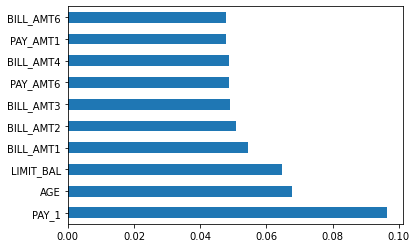

In [67]:
feat_imp1 = clf1.feature_importances_
feat_imp2 = clf2.feature_importances_
ser = pd.Series(data = feat_imp1 , index = feat)
ser.nlargest(10).plot(kind = 'barh')

<AxesSubplot:>

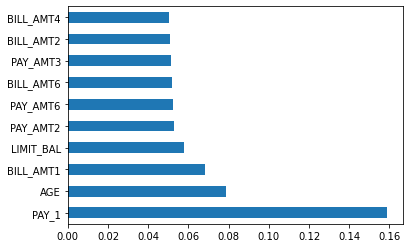

In [68]:
ser2 = pd.Series(data = feat_imp2 , index = feat)
ser2.nlargest(10).plot(kind = 'barh')

<AxesSubplot:>

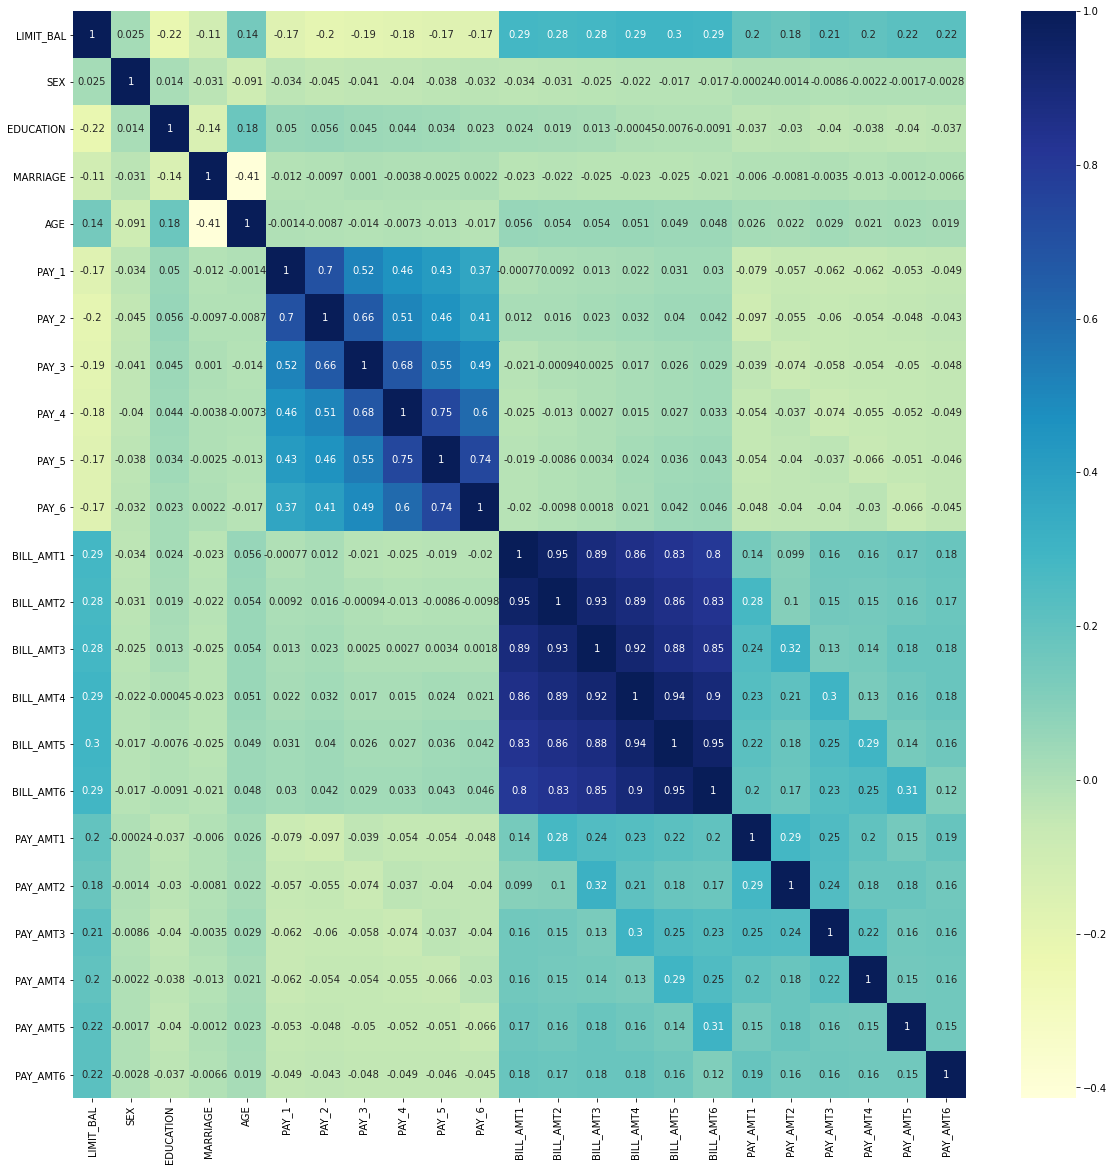

In [73]:
cormat = X.corr()
features_for_corr = cormat.index
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
sns.heatmap(X[features_for_corr].corr() , annot = True , cmap = 'YlGnBu')